## Importing the libraries


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style for graphs
plt.style.use('seaborn-dark')

# Code for ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## importing the data

In [3]:
# importing the data
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
# viewing head values
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Some Basic Stats of IPL

In [5]:
#Basic Stats

print("Number of matches played so far : ", matches.shape[0])
print("Number of seasons : ", len(matches.season.unique()))


Number of matches played so far :  756
Number of seasons :  12


### Number of matches played in each season

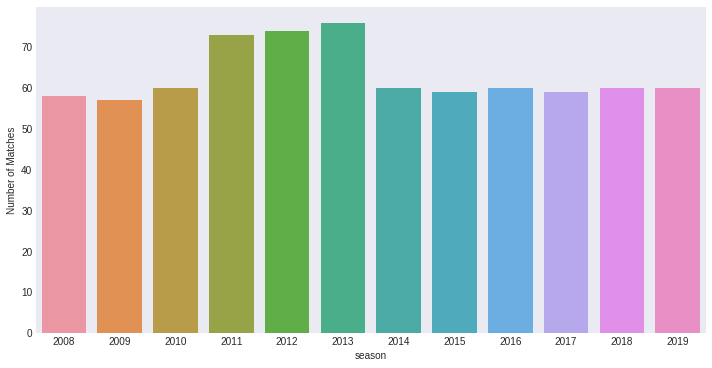

In [6]:
# Number of matches in each season
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches)
plt.ylabel("Number of Matches")
plt.show()


### Narrative
    In the year 2013, the number of matches played are maximum

### Number of matches played in each venues

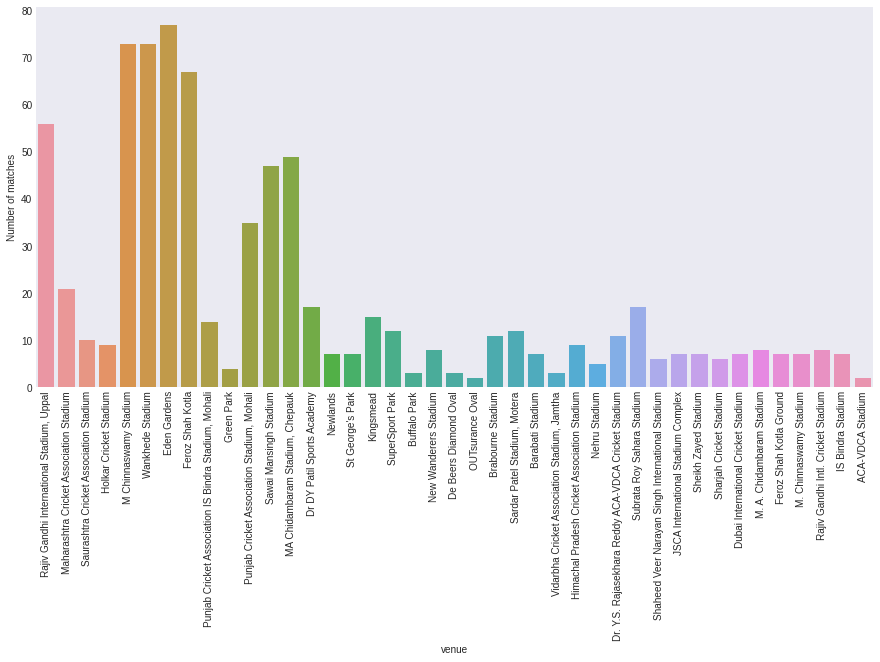

In [7]:
# Number of matches in each venues
plt.figure(figsize=(15,7))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation=90)
plt.ylabel("Number of matches")
plt.show()

### Narrative
    Most matches has been played in feroze shah kotla and least matches is played in ACA-VDCA Stadium

### Number of matches played by each team


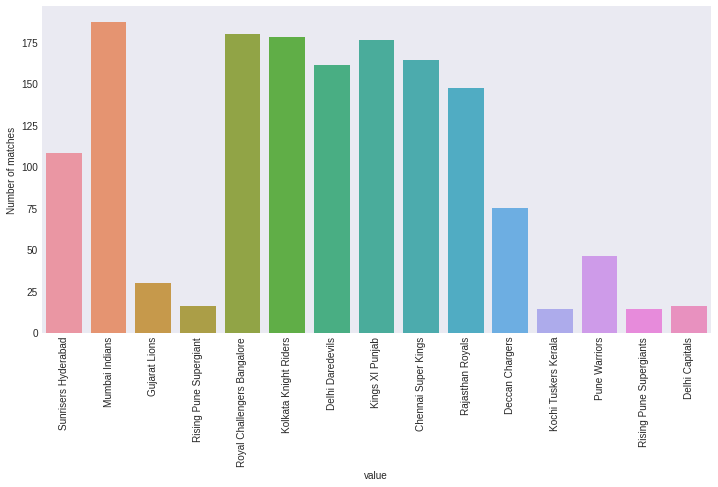

In [8]:
# Number of matches played by each team
temp_df = pd.melt(matches, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.ylabel("Number of matches")
plt.show()

### Narrative
    Mumbai Indians has played the maximum number of matches because they usually qualify for the playoffs.

### Number of matches won by each team

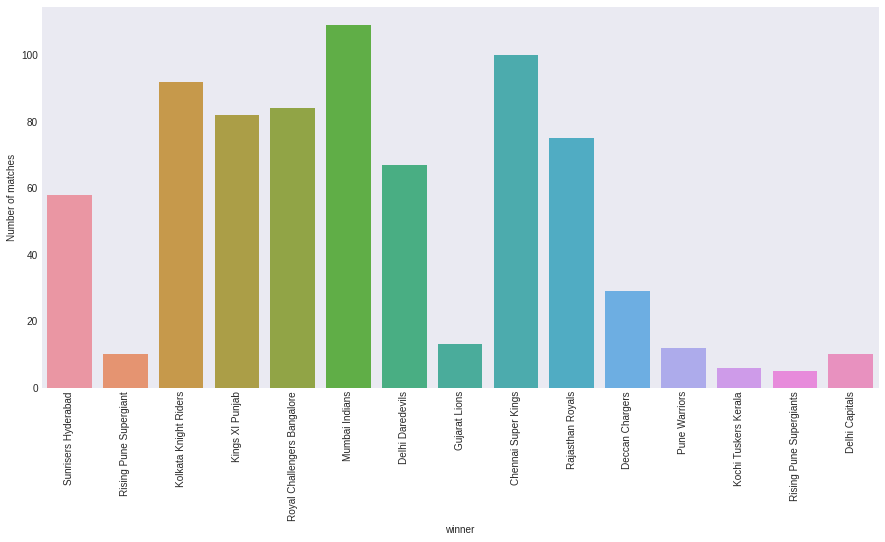

In [9]:
# Number of matches win by a team
plt.figure(figsize=(15,7))
sns.countplot(x='winner', data=matches)
plt.xticks(rotation='vertical')
plt.ylabel("Number of matches")
plt.show()

### Narrative
    Mumbai Indians has won the maximum number of matches

In [10]:
#Winner of each season
temp_df = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Narrative
    Chennai super kings and Mumbai Indians both won the titles for 3 times

## Toss Decision

Text(0.5, 1.0, 'Countplot of Toss Decision')

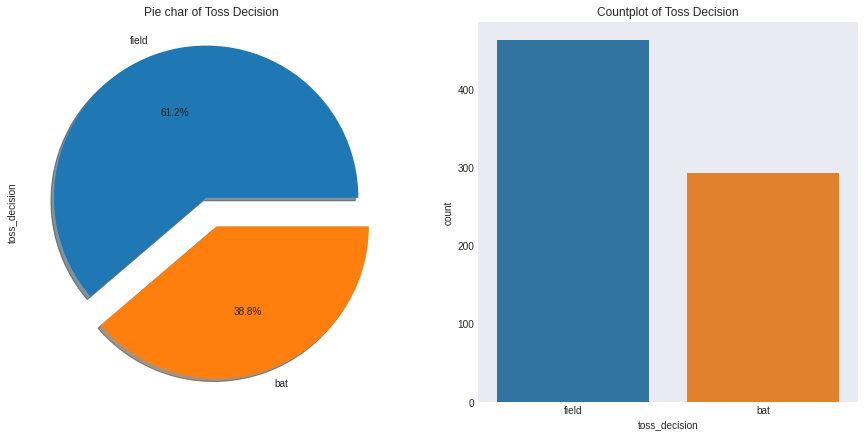

In [11]:
# Toss Decision
fig, ax = plt.subplots(1,2,figsize=(15,7))

matches['toss_decision'].value_counts().plot.pie(explode = [0.1,0.1], autopct="%1.1f%%",ax=ax[0], shadow=True)
ax[0].set_title("Pie char of Toss Decision")

sns.countplot(matches['toss_decision'],ax=ax[1])
ax[1].set_title("Countplot of Toss Decision")

### Narrative
    Most team prefer to choose fieling

## Toss Decision in each Season

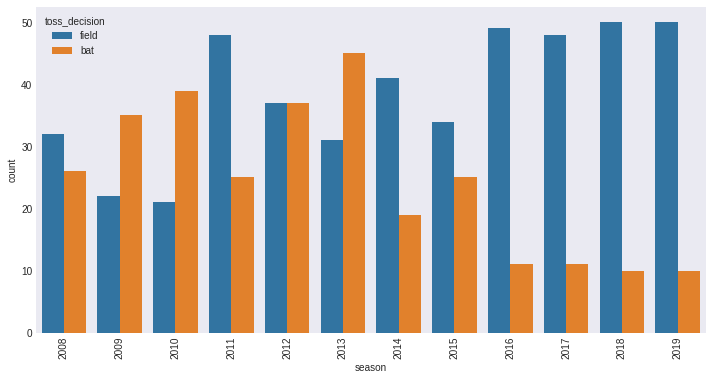

In [12]:
# Toss Decision in each season
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

### Narrative
    Only 2013 is the year where team preferd batting first over fielding first after toss
   

# Percentage of matches won by batting second or fielind first

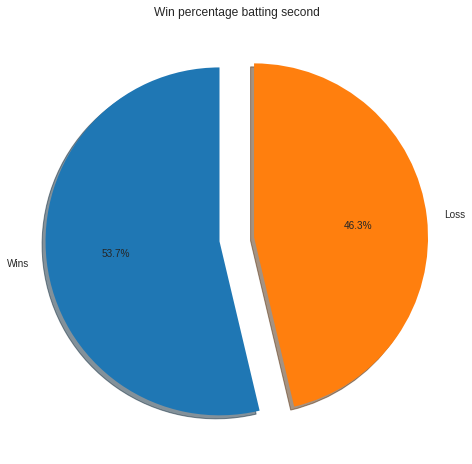

In [13]:
# Percentage of matches won by batting second
plt.figure(figsize=(12,8))
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
plt.pie(sizes, labels=labels, explode =[0.1,0.1],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

### Narrative
    The chances of winning on fielding first is 53%

### Players who won Man of the match most 


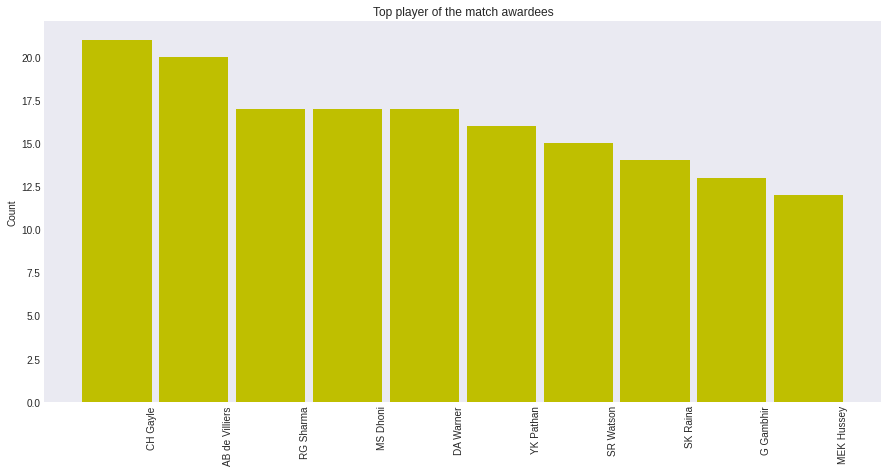

In [14]:
# Players who won Man of the match most 
temp_series = matches.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
fig.set_size_inches(15,7)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
plt.show()

### Narrative
    Chris Gayle won the man of the match award maximum time and behind him there is only AB de villliers

### Top Umpires

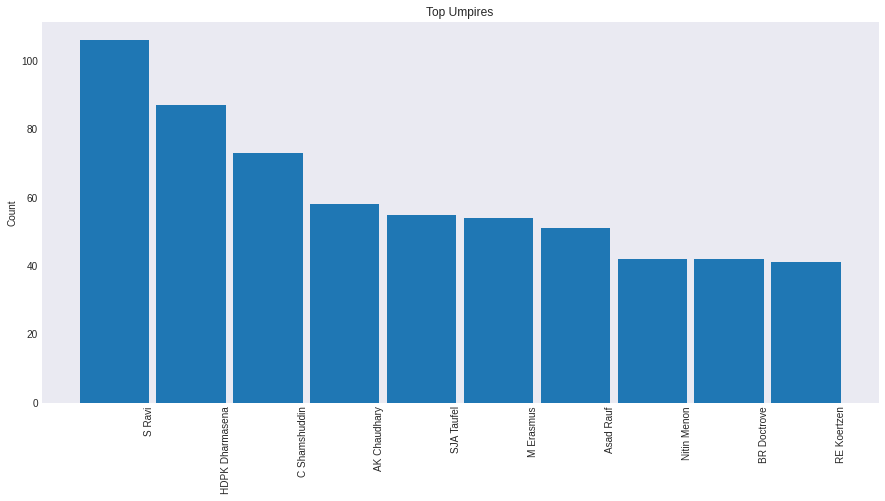

In [15]:
temp_df = pd.melt(matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

# Top umpires
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width)
fig.set_size_inches(15,7)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
plt.show()

In [16]:
# Deliveries Dataset Top Values
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Players who scored most runs

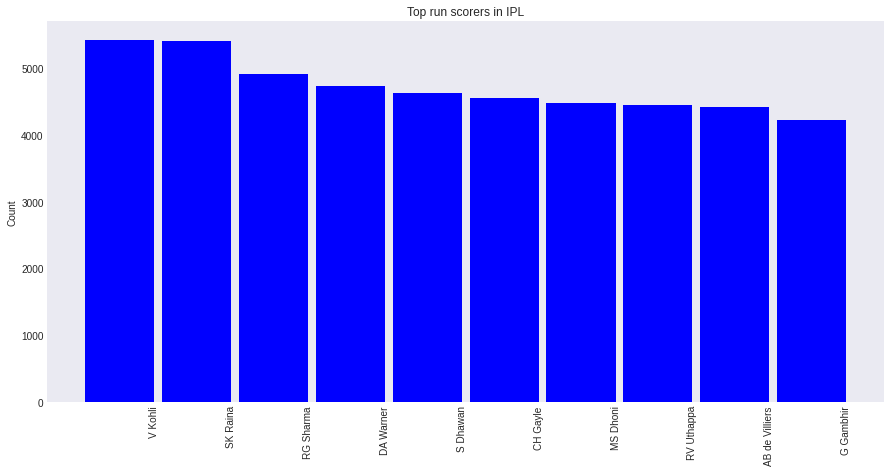

In [17]:
# Players with most runs
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
plt.show()

### Narrative: 
    Virat Kohli is the top run scorer

### Batsmen with most number of boundaries


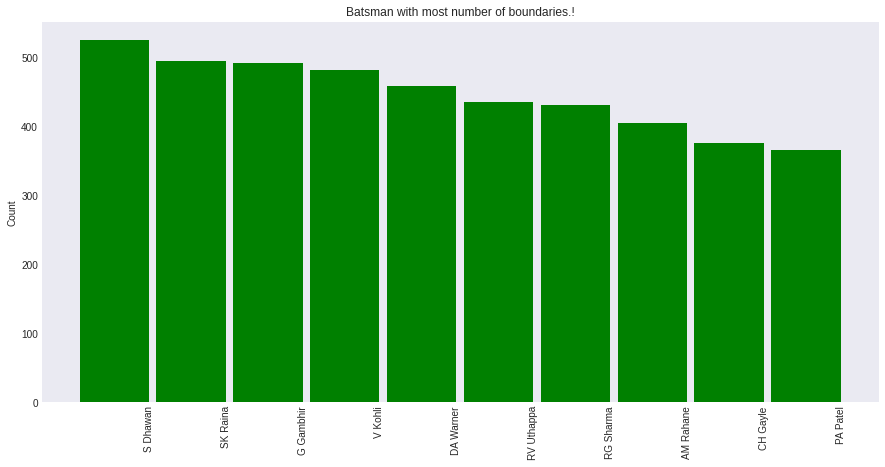

In [18]:
# Batsmen with most number of boundaries
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
plt.show()

### Narrative
    Shikhar dhawan is the one who scored the most boundaries in IPL

### Batsman with most number of maximum (6)


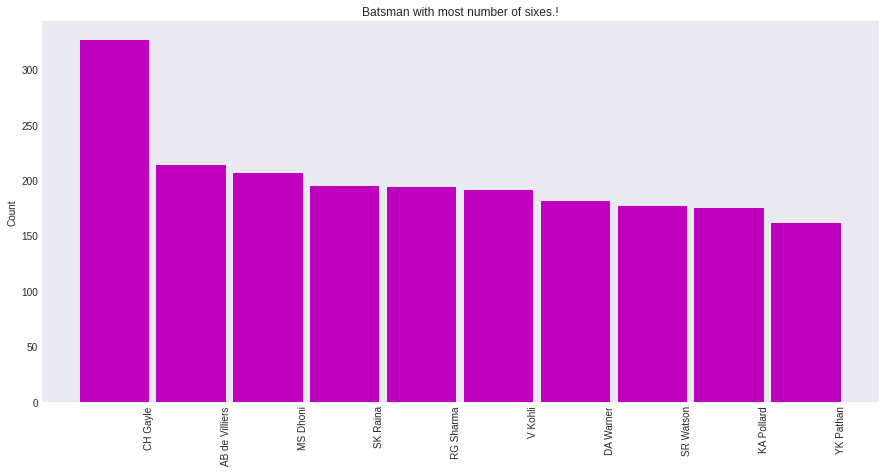

In [19]:
# Batsman with most number of maximum (6)
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
plt.show()


### Narrative
    Chris Gayle is the one who hits the most

### Players who faced most dot balls


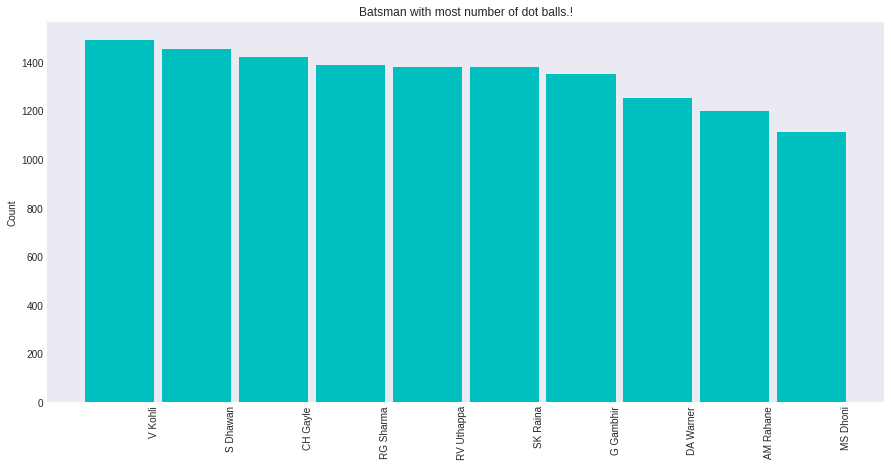

In [20]:
# Players who faced most dot balls
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
plt.show()

### Narrative
    Virat Kohli faced the most number of dot balls

### Players who bowled most number of dot balls


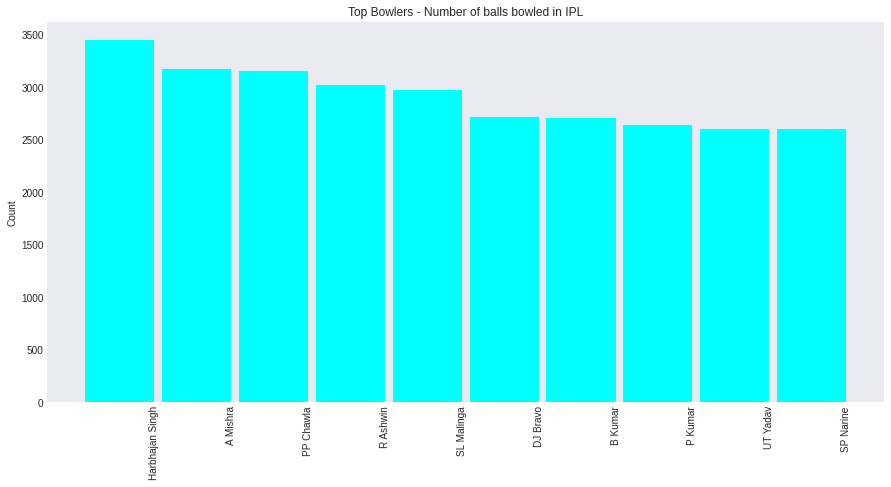

In [21]:
# Players who bowled most number of dot balls
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
plt.show()

### Narrative
    Harbhajan Singh bowled the maximum number of dot balls

### Bowlers who give most extra runs


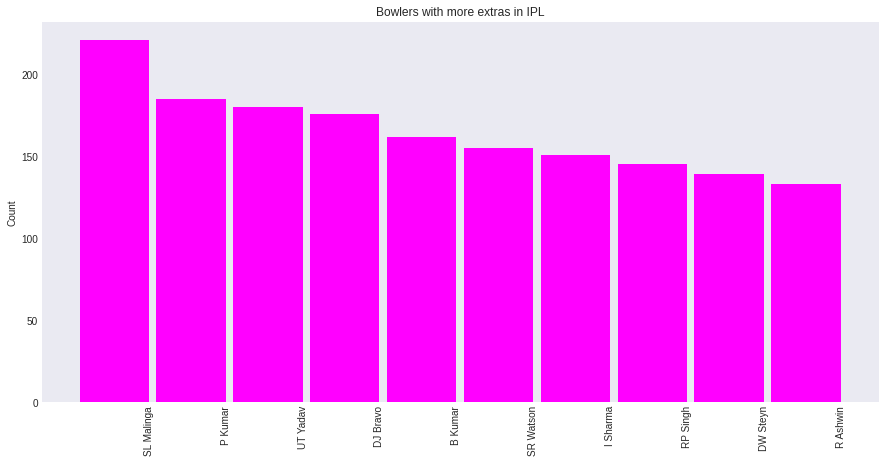

In [22]:
# Bowlers who give most extra runs
temp_df = deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
plt.show()

### Narrative
    Malinga gave the most extra Runs

### Top dissmissals


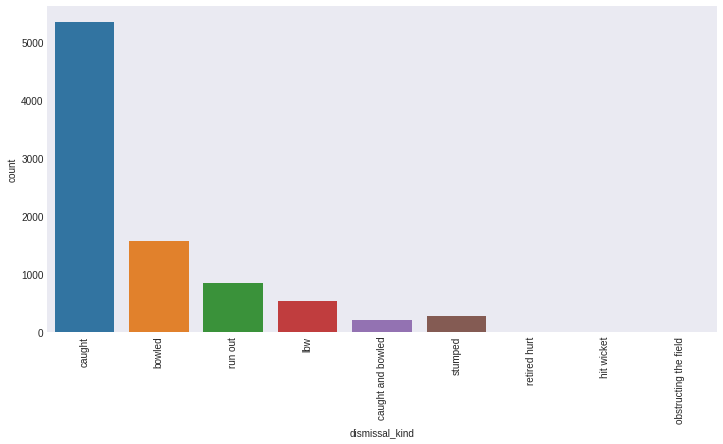

In [23]:
# Top dissmissals
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=deliveries)
plt.xticks(rotation='vertical')
plt.show()

### Narrative
    Top dismissal is by Caught

# Thank You for reading This! Have a great day!